In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

In [2]:
df = pd.read_csv("data/octane.csv", sep=',', index_col='Sample')
df

,Material1,Material2,Material3,Condition,Octane
Sample,,,,,
1,55.33,1.72,54,1.66219,92.19
2,59.13,1.20,53,1.58399,92.74
3,57.39,1.42,55,1.61731,91.88
4,56.43,1.78,55,1.66228,92.80
5,55.98,1.58,54,1.63195,92.56
...,...,...,...,...,...
78,67.60,1.84,55,1.64758,91.86
79,64.81,2.24,54,1.69592,91.61
80,63.13,1.60,52,1.66118,92.17


In [3]:
XY = df.values

In [18]:
# qf = af.averaging_function("WM", rhofunc=func.Power(1.1, 0.01), alpha=0.86)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.86)
amf = af.averaging_function("AM")

In [19]:
c = pca.find_rob_center(XY, wma)
print(c)

[62.20024284  1.64816967 57.65853223  1.53281806 91.35573295]


In [20]:
N = len(XY)
(N - 7) / N

0.9146341463414634

In [21]:
XY1 = XY - c
# S = XY1.T @ XY1
# X2 = XY2[:,0]
# Y2 = XY2[:,1]
# print(S)

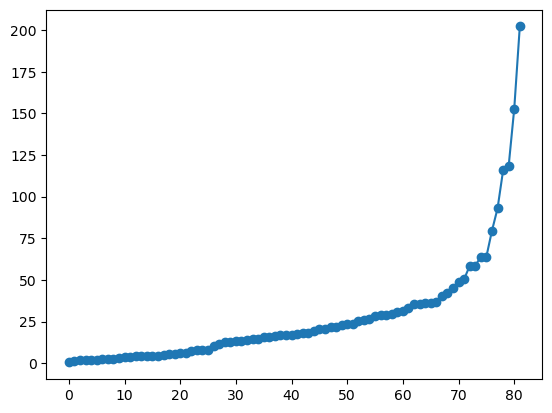

[ 0.95955077 -0.0854615   0.2482365  -0.00797924 -0.10135888]


In [22]:
a0, L0 = pca.find_pc(XY1)
plt.plot(sorted(pca.distance_line(XY1, a0)), marker='o')
plt.show()
print(a0)

(82,)


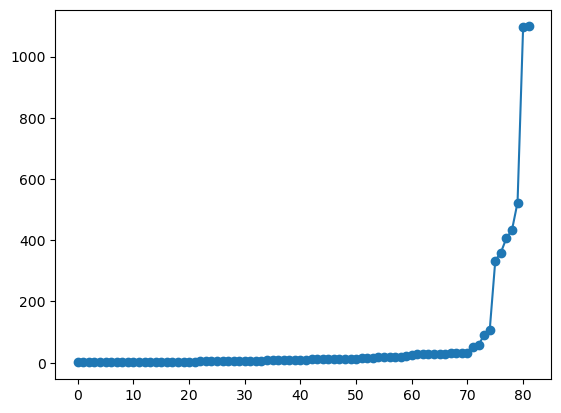

3928.8322770709856 [ 0.95903337 -0.03218425 -0.27605012  0.00999265 -0.05399671]


In [23]:
a1, L1 = pca.find_rob_pc(XY1, wma)
plt.plot(sorted(pca.distance_line(XY1, a1)), marker='o')
plt.show()
print(L1, a1)

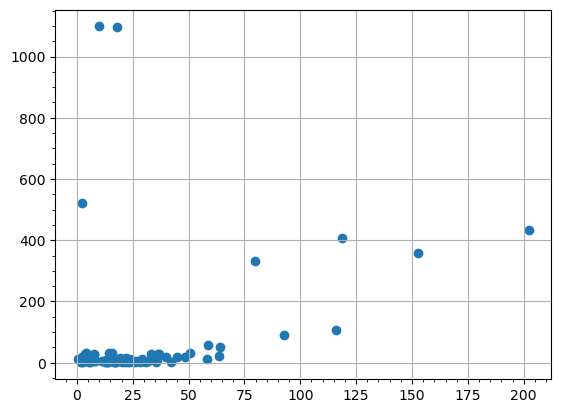

In [24]:
plt.scatter(pca.distance_line(XY1, a0), pca.distance_line(XY1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [26]:
XY2 = pca.project(XY1, a1)

(82,)


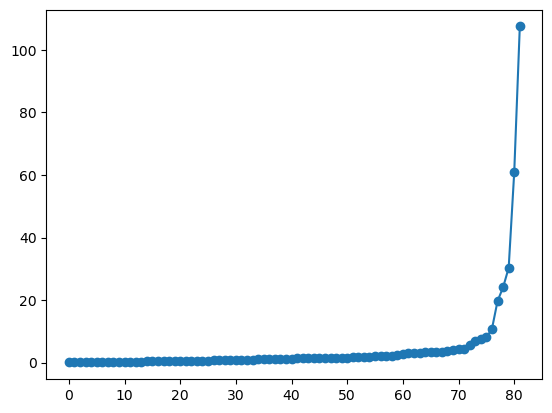

1696.6691867116483 [ 0.26870273  0.08988664  0.9486692  -0.03156572 -0.13692911]


In [45]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.91)
a2, L2 = pca.find_rob_pc(XY2, wma)
plt.plot(sorted(pca.distance_line(XY2, a2)), marker='o')
plt.show()
print(L2, a2)

In [28]:
XY3 = pca.project(XY2, a2)

(82,)


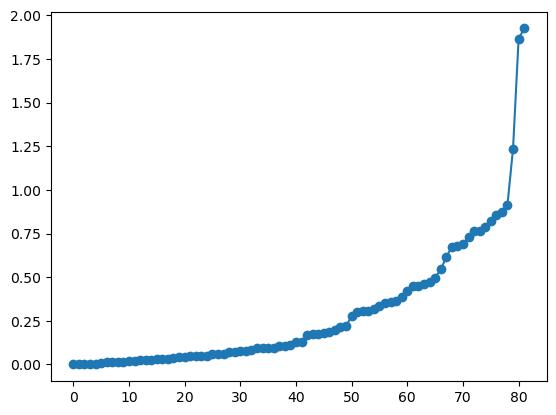

332.703011665859 [ 0.00286593 -0.98416125  0.09589289  0.00847644  0.14883257]


In [46]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.95)
a3, L3 = pca.find_rob_pc(XY3, wma)
plt.plot(sorted(pca.distance_line(XY3, a3)), marker='o')
plt.show()
print(L3, a3)

In [30]:
XY4 = pca.project(XY3, a3)

(82,)


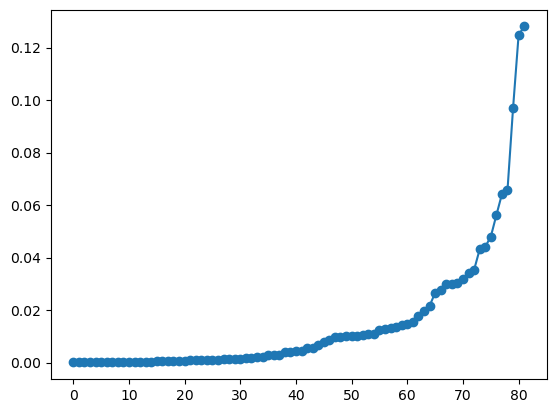

24.192357654941098 [0.08770768 0.2220392  0.09906375 0.17138001 0.95069513]


In [47]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.96)
a4, L4 = pca.find_rob_pc(XY4, wma)
plt.plot(sorted(pca.distance_line(XY4, a4)), marker='o')
plt.show()
print(L4, a4)